# RNN

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# 파일 로드
df = pd.read_csv('전체데이터_병합.csv',encoding='cp949',parse_dates=['y_m'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   y_m               1666 non-null   datetime64[ns]
 1   city              1666 non-null   object        
 2   location          1666 non-null   object        
 3   area_cnt          1666 non-null   float64       
 4   em_cnt            1666 non-null   int64         
 5   em_g              1666 non-null   int64         
 6   pay_amt           1666 non-null   int64         
 7   제주도민_여            1666 non-null   float64       
 8   외국인거주_여           1666 non-null   float64       
 9   제주도민_남            1666 non-null   float64       
 10  외국인거주_남           1666 non-null   float64       
 11  제주도민_60이상         1666 non-null   float64       
 12  제주도민_60미만         1666 non-null   float64       
 13  total_pop         1666 non-null   float64       
 14  패스트푸드_결제건수        1666 n

,y_m,city,location,area_cnt,em_cnt,em_g,pay_amt,제주도민_여,외국인거주_여,제주도민_남,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
0,2018-01-01,서귀포시,남원읍,52.0,9570,42437700,1270773,9306.0,200.0,9806.0,...,6.256586,62.920699,1.891667,0.0,0.0,0.0,0.0,7650.915819,469.700347,1686.010590
1,2018-01-01,서귀포시,대륜동,38.0,21666,57612600,1676850,6637.0,95.0,6836.0,...,8.004301,66.793011,2.958333,0.0,0.0,0.0,0.0,7964.610507,371.723546,420.833558
2,2018-01-01,서귀포시,대정읍,89.0,10185,38885550,1164122,10725.0,677.0,10360.0,...,5.417876,70.940860,1.870833,0.0,0.0,0.0,0.0,4994.300798,410.511223,356.262995
3,2018-01-01,서귀포시,대천동,37.0,20280,53858550,1593709,6475.0,137.0,6685.0,...,8.004301,66.793011,2.958333,0.0,0.0,0.0,0.0,4671.393555,234.238089,225.574534
4,2018-01-01,서귀포시,동홍동,49.0,45936,118701000,3501286,11569.0,642.0,11124.0,...,5.771505,69.944892,3.812500,0.0,0.0,0.0,0.0,3881.022202,270.258431,353.699388


In [3]:
# 결측치 확인
df.isnull().sum()

y_m                 0
city                0
location            0
area_cnt            0
em_cnt              0
em_g                0
pay_amt             0
제주도민_여              0
외국인거주_여             0
제주도민_남              0
외국인거주_남             0
제주도민_60이상           0
제주도민_60미만           0
total_pop           0
패스트푸드_결제건수          0
패스트푸드_결제금액          0
간식_결제건수             0
간식_결제금액             0
농축수산물_결제건수          0
농축수산물_결제금액          0
마트/슈퍼마켓_결제건수        0
마트/슈퍼마켓_결제금액        0
식품_결제건수             0
식품_결제금액             0
배달_결제건수             0
배달_결제금액             0
식당_결제건수             0
식당_결제금액             0
풍속                  0
기온                  0
습도                  0
강수                  0
전국_누적확진자            0
전국_월별확진자            0
제주_누적확진자            0
제주_월별확진자            0
visit_pop_cnt       0
visit_pop_cnt_lf    0
visit_pop_cnt_sf    0
dtype: int64

In [4]:
# 결측치 0으로 처리
df = df.fillna(0)

In [5]:
# 시계열 부분 재설정
df['y_m'] = pd.to_datetime(df['y_m'],format='%Y%m')
df['year'] = df['y_m'].dt.year

In [6]:
# 정규화
scaler = MinMaxScaler()
scale_cols =  df.drop(columns=['y_m', 'city','location'], axis=1)
scale_cols[:] = scaler.fit_transform(scale_cols[:])
scale_cols

,area_cnt,em_cnt,em_g,pay_amt,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,제주도민_60미만,...,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf,year
0,0.283133,0.056415,0.128689,0.128995,0.329521,0.147820,0.361258,0.178631,0.599266,0.286661,...,0.651565,0.044795,0.0,0.00000,0.0,0.000000,0.339151,0.230206,0.167760,0.0
1,0.198795,0.129141,0.175075,0.170545,0.235013,0.070214,0.251842,0.034641,0.315602,0.216744,...,0.691664,0.070054,0.0,0.00000,0.0,0.000000,0.353057,0.182186,0.041874,0.0
2,0.506024,0.060112,0.117831,0.118083,0.379767,0.500370,0.381668,0.351002,0.575097,0.349041,...,0.734617,0.044302,0.0,0.00000,0.0,0.000000,0.221388,0.201196,0.035449,0.0
3,0.192771,0.120808,0.163600,0.162038,0.229277,0.101256,0.246279,0.044658,0.255934,0.222927,...,0.691664,0.070054,0.0,0.00000,0.0,0.000000,0.207074,0.114803,0.022445,0.0
4,0.265060,0.275063,0.361806,0.357223,0.409653,0.474501,0.409814,0.260434,0.420587,0.405379,...,0.724303,0.090281,0.0,0.00000,0.0,0.000000,0.172039,0.132457,0.035194,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,0.493976,0.506085,0.449648,0.449399,0.586700,0.147820,0.592286,0.031302,0.840095,0.507911,...,0.784863,0.119783,1.0,0.62556,1.0,0.696429,0.115333,0.103056,0.001182,1.0
1662,0.819277,0.165612,0.194378,0.194523,0.439857,0.178862,0.479553,0.116444,0.732413,0.387415,...,0.854373,0.148002,1.0,0.62556,1.0,0.696429,0.597496,0.184827,0.003059,1.0
1663,0.397590,0.047162,0.081684,0.081838,0.160440,0.073910,0.170461,0.098915,0.371170,0.122355,...,0.970684,0.172176,1.0,0.62556,1.0,0.696429,0.172264,0.295934,0.001377,1.0
1664,0.644578,0.153113,0.251904,0.252345,0.366170,0.842572,0.401230,0.872287,0.697346,0.363712,...,0.963003,0.160039,1.0,0.62556,1.0,0.696429,0.509713,0.297953,0.002816,1.0


In [7]:
# 데이터셋 분리(시계열)

TEST_SIZE = 1512 # 3년 데이터
WINDOW_SIZE = 254 # 6개월 데이터

test = scale_cols[:-TEST_SIZE]
train = scale_cols[-TEST_SIZE:]

In [8]:
# 훈련데이터와 테스트데이터 분리에 사용할 함수 정의
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [9]:
# 훈련데이터와 테스트데이터 분리
feature_cols = scale_cols.columns
label_cols = ['em_g']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1193, 20, 37), (299, 20, 37))

In [10]:
# 데이터셋 형태 확인
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((154, 37), (154, 1))

In [11]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((134, 20, 37), (134, 1))

In [12]:
# tensorflow, keras 로드
import tensorflow as tf
from tensorflow import keras

In [13]:
# keras 모형 불러오기
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [14]:
# 훈련 진행
import os

model.compile(loss='mean_squared_error', optimizer='adam',metrics=["acc"]) # acc 안나올때
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
75/75 [==============================] - 3s 14ms/step - loss: 0.0514 - acc: 8.3822e-04 - val_loss: 0.0325 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.03253, saving model to model\tmp_checkpoint.h5
Epoch 2/200
75/75 [==============================] - 1s 9ms/step - loss: 0.0330 - acc: 8.3822e-04 - val_loss: 0.0304 - val_acc: 0.0000e+00

Epoch 00002: val_loss improved from 0.03253 to 0.03039, saving model to model\tmp_checkpoint.h5
Epoch 3/200
75/75 [==============================] - 1s 17ms/step - loss: 0.0314 - acc: 8.3822e-04 - val_loss: 0.0289 - val_acc: 0.0000e+00

Epoch 00003: val_loss improved from 0.03039 to 0.02893, saving model to model\tmp_checkpoint.h5
Epoch 4/200
75/75 [==============================] - 1s 10ms/step - loss: 0.0298 - acc: 8.3822e-04 - val_loss: 0.0267 - val_acc: 0.0000e+00

Epoch 00004: val_loss improved from 0.02893 to 0.02667, saving model to model\tmp_checkpoint.h5
Epoch 5/200
75/75 [==============================] - 3s 4

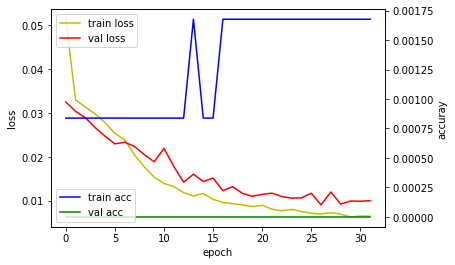

In [15]:
# 훈련 및 검증 loss, accuracy 그래프
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.savefig('rnn_m.png')

In [16]:
# 모델 로드 및 예측
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(134, 1)

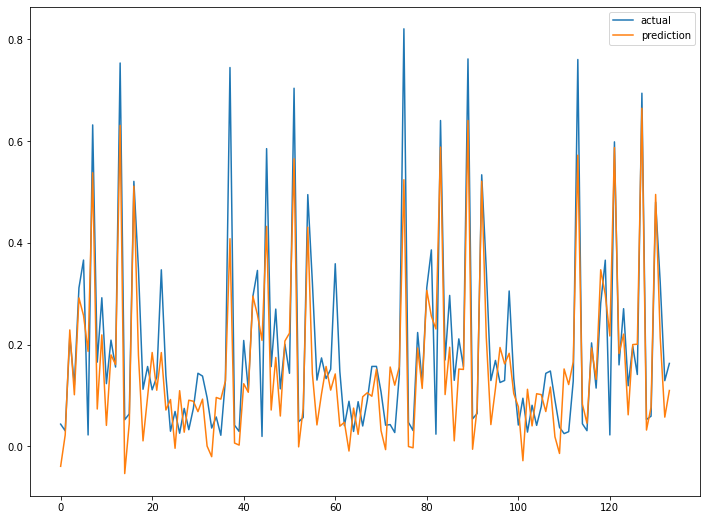

In [17]:
# 예측 그래프 확인
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.savefig('rnn_p_m.png')